In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("Housing.csv")

# Show the first 5 rows
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [2]:
# Basic info
print("Shape of dataset:", df.shape)
print("\nColumn info:")
print(df.info())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Show unique values for categorical columns (optional)
print("\nUnique values in each column:")
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"{col}: {df[col].unique()}")


Shape of dataset: (545, 13)

Column info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None

Missing values in each column:
price               0
area                0
bedrooms            0
bathrooms

In [3]:
# Convert yes/no to 1/0
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})

# One-hot encode 'furnishingstatus'
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

# Check the cleaned dataset
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False


In [5]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('price', axis=1)
y = df['price']

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show shapes of resulting datasets
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


X_train: (436, 13)
X_test: (109, 13)
y_train: (436,)
y_test: (109,)


In [6]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Show the first 5 predictions
print("Predicted prices:", y_pred[:5])
print("Actual prices:   ", y_test.values[:5])


Predicted prices: [5164653.90033967 7224722.29802166 3109863.24240338 4612075.32722559
 3294646.25725955]
Actual prices:    [4060000 6650000 3710000 6440000 2800000]


In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


Mean Absolute Error (MAE): 970043.4039201637
Mean Squared Error (MSE): 1754318687330.6633
R² Score: 0.6529242642153185


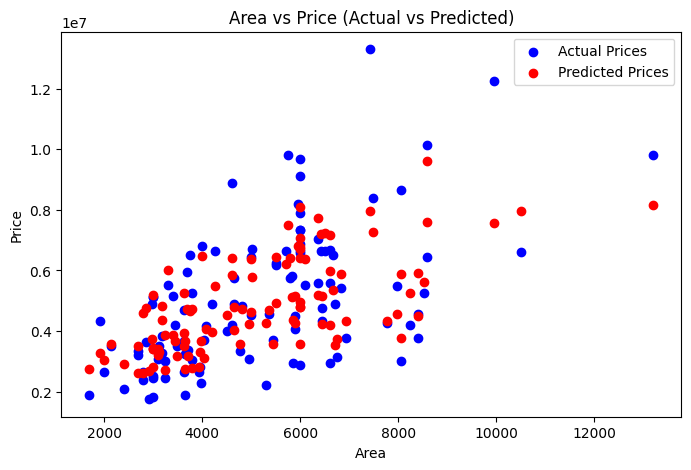

In [8]:
# Use only 'area' feature for simple visualization
plt.figure(figsize=(8, 5))
plt.scatter(X_test['area'], y_test, color='blue', label='Actual Prices')
plt.scatter(X_test['area'], y_pred, color='red', label='Predicted Prices')
plt.title("Area vs Price (Actual vs Predicted)")
plt.xlabel("Area")
plt.ylabel("Price")
plt.legend()
plt.show()


In [10]:
# Show coefficients with their corresponding feature names
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

# Show intercept
print("Intercept:", model.intercept_)
coefficients.sort_values(by='Coefficient', ascending=False)


Intercept: 260032.35760741122


,Feature,Coefficient
2,bathrooms,1.094445e+06
8,airconditioning,7.914267e+05
7,hotwaterheating,6.846499e+05
10,prefarea,6.298906e+05
3,stories,4.074766e+05
6,basement,3.902512e+05
4,mainroad,3.679199e+05
5,guestroom,2.316100e+05
9,parking,2.248419e+05
1,bedrooms,7.677870e+04
